In [1]:
# Import all libraries
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import itertools
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
# Load data from CSV file
diabetes_data = pd.read_csv('Pima_diabetes.csv')

In [3]:
# Properties of dataset
diabetes_data.shape         # Size row*column

(768, 9)

In [4]:
diabetes_data.head(77)      # return first 77 rows of dataset

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
72,13,126,90,0,0,43.4,0.583,42,1
73,4,129,86,20,270,35.1,0.231,23,0
74,1,79,75,30,0,32.0,0.396,22,0
75,1,0,48,20,0,24.7,0.140,22,0


True cases / diabetes=YES : 268
False cases / diabetes=NO : 500
True cases in percentage : 34.89583333333333 %
False cases in percentage: 65.10416666666666 %


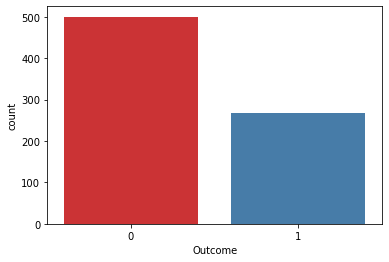

In [5]:
# Data visualization
sns.countplot(x = 'Outcome',data = diabetes_data,palette="Set1")     # To count how many zero's and one's in Outcome column
total_obs = len(diabetes_data)
total_true = len(diabetes_data.loc[diabetes_data['Outcome'] == 1])
total_false = len(diabetes_data.loc[diabetes_data['Outcome'] == 0])
print("True cases / diabetes=YES : {0}".format(total_true))
print("False cases / diabetes=NO : {0}".format(total_false))
true_case_in_per=(total_true/total_obs)*100
false_case_in_per=(total_false/total_obs)*100
print("True cases in percentage : {0} %".format(true_case_in_per))
print("False cases in percentage: {0} %".format(false_case_in_per))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020507FCD2C8>,
      dtype=object)

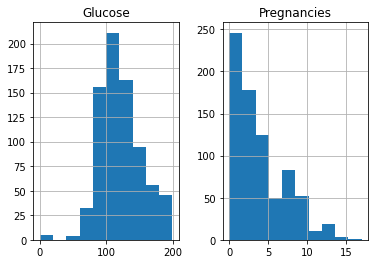

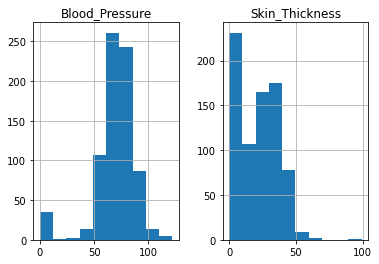

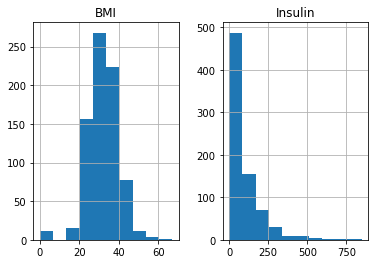

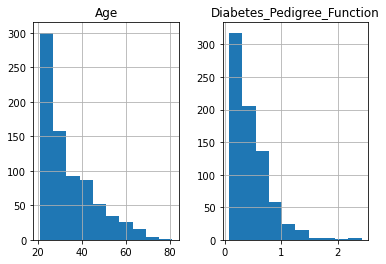

In [6]:
# Histogram plot for each feature
feat_set1=['Pregnancies', 'Glucose']
feat_set2=['Blood_Pressure','Skin_Thickness']
feat_set3=['Insulin', 'BMI']
feat_set4=['Diabetes_Pedigree_Function', 'Age']

diabetes_data.hist(feat_set1,rwidth=20)
diabetes_data.hist(feat_set2,rwidth=20)
diabetes_data.hist(feat_set3,rwidth=20)
diabetes_data.hist(feat_set4,rwidth=20)

In [7]:
diabetes_data.corr()        # for finding the pairwise correlation of all columns in diabetes_data

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Blood_Pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
Skin_Thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Diabetes_Pedigree_Function,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


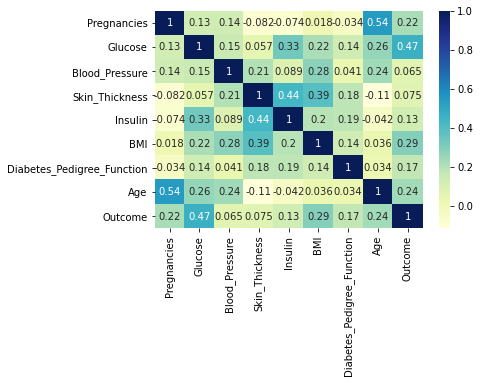

In [8]:
# Correlation Heatmap for dataset
sns.heatmap(diabetes_data.corr(), annot = True,cmap="YlGnBu")
plt.show()

In [9]:
# Preprocessing starts
any_null = diabetes_data.isnull().values.any()       # Check if there is any null value
print (any_null)

False


In [10]:
dataset_copy=diabetes_data                # Copy of dataset created

In [11]:
# Analyse each features of dataset to remove anomalies
# 1) Glucose = 0 is not realistic so replace it with mean value
dataset_copy[["Glucose"]] = dataset_copy[["Glucose"]].replace(0, np.NaN)
dataset_copy["Glucose"].fillna(dataset_copy["Glucose"].mean(), inplace = True)      # Nan = mean value
dataset_copy.head(77)

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
0,6,148.000000,72,35,0,33.6,0.627,50,1
1,1,85.000000,66,29,0,26.6,0.351,31,0
2,8,183.000000,64,0,0,23.3,0.672,32,1
3,1,89.000000,66,23,94,28.1,0.167,21,0
4,0,137.000000,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
72,13,126.000000,90,0,0,43.4,0.583,42,1
73,4,129.000000,86,20,270,35.1,0.231,23,0
74,1,79.000000,75,30,0,32.0,0.396,22,0
75,1,121.686763,48,20,0,24.7,0.140,22,0


In [12]:
# 2) Skin Thickness  = 0 is not realistic so replace it with mean value
dataset_copy[["Skin_Thickness"]] = dataset_copy[["Skin_Thickness"]].replace(0, np.NaN)
dataset_copy["Skin_Thickness"].fillna(dataset_copy["Skin_Thickness"].mean(), inplace = True) 
dataset_copy.head(5)

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
0,6,148.0,72,35.00000,0,33.6,0.627,50,1
1,1,85.0,66,29.00000,0,26.6,0.351,31,0
2,8,183.0,64,29.15342,0,23.3,0.672,32,1
3,1,89.0,66,23.00000,94,28.1,0.167,21,0
4,0,137.0,40,35.00000,168,43.1,2.288,33,1


In [13]:
# 3) Blood pressure  = 0 is not realistic so replace it with mean value
dataset_copy[["Blood_Pressure"]] = dataset_copy[["Blood_Pressure"]].replace(0, np.NaN)
dataset_copy["Blood_Pressure"].fillna(dataset_copy["Blood_Pressure"].mean(), inplace = True) 
dataset_copy.head(10)

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
0,6,148.0,72.000000,35.00000,0,33.6,0.627,50,1
1,1,85.0,66.000000,29.00000,0,26.6,0.351,31,0
2,8,183.0,64.000000,29.15342,0,23.3,0.672,32,1
3,1,89.0,66.000000,23.00000,94,28.1,0.167,21,0
4,0,137.0,40.000000,35.00000,168,43.1,2.288,33,1
5,5,116.0,74.000000,29.15342,0,25.6,0.201,30,0
6,3,78.0,50.000000,32.00000,88,31.0,0.248,26,1
7,10,115.0,72.405184,29.15342,0,35.3,0.134,29,0
8,2,197.0,70.000000,45.00000,543,30.5,0.158,53,1
9,8,125.0,96.000000,29.15342,0,0.0,0.232,54,1


In [14]:
# 4) BMI  = 0 is not realistic so replace it with mean value
dataset_copy[["BMI"]] = dataset_copy[["BMI"]].replace(0, np.NaN)
dataset_copy["BMI"].fillna(dataset_copy["BMI"].mean(), inplace = True) 
dataset_copy.head(10)

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
0,6,148.0,72.000000,35.00000,0,33.600000,0.627,50,1
1,1,85.0,66.000000,29.00000,0,26.600000,0.351,31,0
2,8,183.0,64.000000,29.15342,0,23.300000,0.672,32,1
3,1,89.0,66.000000,23.00000,94,28.100000,0.167,21,0
4,0,137.0,40.000000,35.00000,168,43.100000,2.288,33,1
5,5,116.0,74.000000,29.15342,0,25.600000,0.201,30,0
6,3,78.0,50.000000,32.00000,88,31.000000,0.248,26,1
7,10,115.0,72.405184,29.15342,0,35.300000,0.134,29,0
8,2,197.0,70.000000,45.00000,543,30.500000,0.158,53,1
9,8,125.0,96.000000,29.15342,0,32.457464,0.232,54,1


In [15]:
# 5) Insulin  = 0 is not realistic so replace it with mean value
dataset_copy[["Insulin"]] = dataset_copy[["Insulin"]].replace(0, np.NaN)
dataset_copy["Insulin"].fillna(dataset_copy["Insulin"].mean(), inplace = True) 
dataset_copy.head(10)

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
0,6,148.0,72.000000,35.00000,155.548223,33.600000,0.627,50,1
1,1,85.0,66.000000,29.00000,155.548223,26.600000,0.351,31,0
2,8,183.0,64.000000,29.15342,155.548223,23.300000,0.672,32,1
3,1,89.0,66.000000,23.00000,94.000000,28.100000,0.167,21,0
4,0,137.0,40.000000,35.00000,168.000000,43.100000,2.288,33,1
5,5,116.0,74.000000,29.15342,155.548223,25.600000,0.201,30,0
6,3,78.0,50.000000,32.00000,88.000000,31.000000,0.248,26,1
7,10,115.0,72.405184,29.15342,155.548223,35.300000,0.134,29,0
8,2,197.0,70.000000,45.00000,543.000000,30.500000,0.158,53,1
9,8,125.0,96.000000,29.15342,155.548223,32.457464,0.232,54,1


In [16]:
# Split dataset in train/test set
Ind_x = ['Pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin', 'BMI', 'Diabetes_Pedigree_Function', 'Age']
dep_y = ['Outcome']

X = dataset_copy[Ind_x].values               # frame independent variables 
y = dataset_copy[dep_y].values               # frame dependent variable 

X_for_train, X_for_test, y_for_train, y_for_test = train_test_split(X, y, test_size=0.3, random_state=42)     #train:test = 70%:30%

print("Shape of train X:{0} , Shape of test X:{1} , Shape of train y:{2} , Shape of text y:{3}".format(X_for_train.shape, X_for_test.shape, y_for_train.shape, y_for_test.shape))


Shape of train X:(537, 8) , Shape of test X:(231, 8) , Shape of train y:(537, 1) , Shape of text y:(231, 1)


In [17]:
# Training of model Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
LOR_train = LogisticRegression(C=0.4,random_state = 42,max_iter=200).fit(X_for_train,y_for_train.ravel())

In [18]:
# Testing of model Logistic regression
LOR_test = LOR_train.predict(X_for_test)

Confusion Matrix for logistic regression:
[[ 47  33]
 [ 27 124]]
Classification Report for logistic regression:
              precision    recall  f1-score   support

           1       0.64      0.59      0.61        80
           0       0.79      0.82      0.81       151

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231

Logistic regression testing accuracy : 74.0260

Confusion Matrix Heatmap for logistic regression:


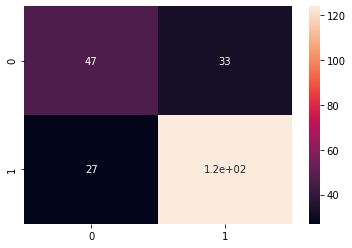

In [19]:
# Evaluation of LR model
print ("Confusion Matrix for logistic regression:")
print (metrics.confusion_matrix(y_for_test,LOR_test, labels=[1, 0]))
print ("Classification Report for logistic regression:")
print (metrics.classification_report(y_for_test,LOR_test, labels=[1, 0]))
accuracy_LOR= metrics.accuracy_score(y_for_test,LOR_test)
print("Logistic regression testing accuracy : {0:.4f}".format(accuracy_LOR*100))
print("")
print("Confusion Matrix Heatmap for logistic regression:")
cm_heatmap = confusion_matrix(y_for_test, LOR_test, labels=[1, 0])
sns.heatmap(pd.DataFrame(cm_heatmap), annot=True)

In [20]:
# Training of SVM model
from sklearn.svm import SVC
SVM_train = SVC(C=0.3,kernel = 'linear', random_state = 42 ).fit(X_for_train,y_for_train.ravel())

In [21]:
# Testing of SVM model
from sklearn import metrics
SVM_test = SVM_train.predict(X_for_test)

Confusion Matrix for SVM:
[[ 47  33]
 [ 28 123]]
Classification Report for SVM:
              precision    recall  f1-score   support

           1       0.63      0.59      0.61        80
           0       0.79      0.81      0.80       151

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231

SVM testing accuracy : 73.5931

Confusion Matrix Heatmap for SVM:


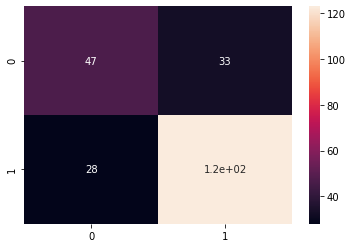

In [22]:
# Evaluation of SVM model
print ("Confusion Matrix for SVM:")
print (metrics.confusion_matrix(y_for_test,SVM_test, labels=[1, 0]))
print ("Classification Report for SVM:")
print (metrics.classification_report(y_for_test,SVM_test, labels=[1, 0]))
accuracy_SVM = metrics.accuracy_score(y_for_test,SVM_test)
print ("SVM testing accuracy : {0:.4f}".format(accuracy_SVM*100))
print("")
print("Confusion Matrix Heatmap for SVM:")
cm_heatmap = confusion_matrix(y_for_test, SVM_test, labels=[1, 0])
sns.heatmap(pd.DataFrame(cm_heatmap), annot=True)

In [23]:
# Training of KNN classifier
from sklearn.neighbors import KNeighborsClassifier
KNN_train = KNeighborsClassifier(n_neighbors = 56, metric = 'minkowski', p = 2).fit(X_for_train,y_for_train.ravel())

In [24]:
# Testing of KNN classifier
from sklearn import metrics
KNN_test = KNN_train.predict(X_for_test)

Confusion Matrix for KNN:
[[ 37  43]
 [ 20 131]]
Classification Report for KNN:
              precision    recall  f1-score   support

           1       0.65      0.46      0.54        80
           0       0.75      0.87      0.81       151

    accuracy                           0.73       231
   macro avg       0.70      0.67      0.67       231
weighted avg       0.72      0.73      0.71       231

KNN testing accuracy : 72.7273

Confusion Matrix Heatmap for KNN:


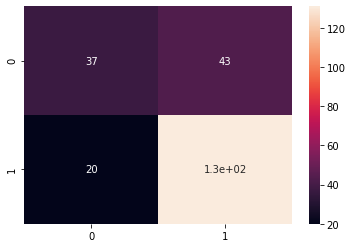

In [25]:
# Evaluation of KNN model
print ("Confusion Matrix for KNN:")
print (metrics.confusion_matrix(y_for_test,KNN_test, labels=[1, 0]))
print ("Classification Report for KNN:")
print (metrics.classification_report(y_for_test,KNN_test, labels=[1, 0]))
accuracy_KNN = metrics.accuracy_score(y_for_test,KNN_test)
print ("KNN testing accuracy : {0:.4f}".format(accuracy_KNN*100))
print("")
print("Confusion Matrix Heatmap for KNN:")
cm_heatmap = confusion_matrix(y_for_test, KNN_test, labels=[1, 0])
sns.heatmap(pd.DataFrame(cm_heatmap), annot=True)

In [26]:
# Training of Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
DT_train = DecisionTreeClassifier(criterion = 'entropy', random_state = 42).fit(X_for_train,y_for_train.ravel())

In [27]:
# Testing of Decision tree classifier
from sklearn import metrics
DT_test = DT_train.predict(X_for_test)

Confusion Matrix for decision tree:
[[ 56  24]
 [ 38 113]]
Classification Report for decision tree:
              precision    recall  f1-score   support

           1       0.60      0.70      0.64        80
           0       0.82      0.75      0.78       151

    accuracy                           0.73       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.75      0.73      0.74       231

Decision tree testing accuracy : 73.1602

Confusion Matrix Heatmap for decision tree:


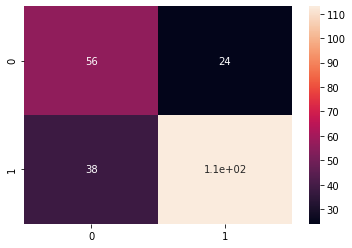

In [28]:
#Evaluation of Decision tree model
print ("Confusion Matrix for decision tree:")
print (metrics.confusion_matrix(y_for_test,DT_test, labels=[1, 0]))
print ("Classification Report for decision tree:")
print (metrics.classification_report(y_for_test,DT_test, labels=[1, 0]))
accuracy_DT = metrics.accuracy_score(y_for_test,DT_test)
print ("Decision tree testing accuracy : {0:.4f}".format(accuracy_DT*100))
print("")
print("Confusion Matrix Heatmap for decision tree:")
cm_heatmap = confusion_matrix(y_for_test, DT_test, labels=[1, 0])
sns.heatmap(pd.DataFrame(cm_heatmap), annot=True)

In [29]:
# Training of Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
RF_train = RandomForestClassifier(n_estimators = 14, criterion = 'entropy', random_state = 42).fit(X_for_train,y_for_train.ravel())

In [30]:
# Testing of Random Forest classifier
from sklearn import metrics
RF_test = RF_train.predict(X_for_test)

Confusion Matrix for random forest:
[[ 50  30]
 [ 28 123]]
Classification Report for random forest:
              precision    recall  f1-score   support

           1       0.64      0.62      0.63        80
           0       0.80      0.81      0.81       151

    accuracy                           0.75       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231

Random Forest testing accuracy: 74.8918

Confusion Matrix Heatmap for random forest:


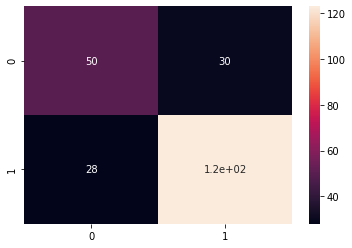

In [31]:
# Evaluation of Random Forest classifier
print ("Confusion Matrix for random forest:")
print (metrics.confusion_matrix(y_for_test,RF_test, labels=[1, 0]))
print ("Classification Report for random forest:")
print (metrics.classification_report(y_for_test,RF_test, labels=[1, 0]))
accuracy_RF = metrics.accuracy_score(y_for_test,RF_test)
print ("Random Forest testing accuracy: {0:.4f}".format(accuracy_RF*100))
print("")
print("Confusion Matrix Heatmap for random forest:")
cm_heatmap = confusion_matrix(y_for_test, RF_test, labels=[1, 0])
sns.heatmap(pd.DataFrame(cm_heatmap), annot=True)